In [1]:
import time
import lhapdf
import numpy as np
from random import sample
import sys
import matplotlib.pyplot as plt
%matplotlib inline

from pycompressor.pdf_grid import XGrid, PdfSet
from pycompressor.estimators import Estimators
from pycompressor.err_function import compute_erfm
from pycompressor.err_function import compute_erfs
from pycompressor.err_function import compute_erfc
from pycompressor.err_function import ErfComputation
from pycompressor.compressor import error_function

In [2]:
# Physical Parameters
pdfname = "NNPDF31_nnlo_as_0118_1000"
Qscale  = 1
nf = 2
# construct grid
x = XGrid().build_xgrid()
# x = np.linspace(1e-2,0.9,5)

# Construct Toy Prior set
pdf = PdfSet(pdfname, x, Qscale, nf).build_pdf()
print(f'Initial pdf shape: {pdf.shape}')

def sampling(replica, number):
    """
    Sample a subset a replicas
    """
    # Construct toy Reduced set
    index = np.random.choice(
        replica.shape[0],
        number,
        replace=False
    )
    return replica[index]

# Construc Toy Prior and Reduced sets
prior = sampling(pdf, 100)
print(f'Prior pdf shape: {prior.shape}')
reduc = sampling(prior, 50)
print(f'Reduced pdf shape: {reduc.shape}')

Initial pdf shape: (1000, 5, 104)
Prior pdf shape: (100, 5, 104)
Reduced pdf shape: (50, 5, 104)


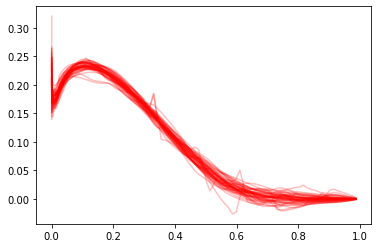

In [3]:
plt.figure()
for p in range(reduc.shape[0]):
    plt.plot(x, reduc[p][3], color="red", alpha=.25)
plt.show()

In [4]:
est = Estimators(prior)

In [5]:
MomentEstimators = [
    "mean",
    "stdev",
    "kurtosis",
    "skewness",
    "moment5th",
    "moment6th"
]

In [6]:
# Test Estimators Only
for st in MomentEstimators:
    print(getattr(est, st, None)().shape)

(5, 104)
(5, 104)
(5, 104)
(5, 104)
(5, 104)
(5, 104)


In [7]:
%time est.kolmogorov_smirnov().shape

CPU times: user 9.98 ms, sys: 301 µs, total: 10.3 ms
Wall time: 8.89 ms


(5, 104, 6)

In [8]:
# est.correlation().shape

In [9]:
est1 = Estimators(prior)
est2 = Estimators(reduc)

In [10]:
for st in MomentEstimators:
    print(compute_erfm(est1, est2, st))

594069.7196305359
4.725093881541895
14430.20558465661
80389.15154059968
5101.625145293691
77.54463007156026


In [11]:
compute_erfs(est1, est2, 'kolmogorov_smirnov')

739.9217184513072

In [ ]:
erf = ErfComputation(prior, reduc)

In [ ]:
for st in MomentEstimators:
    print(erf.normalize_erfm(st))

In [ ]:
for st in MomentEstimators:
    print(erf.erfm(st))

In [ ]:
%time erf.normalize_erfs('kolmogorov_smirnov')

In [ ]:
%time erf.normalize_erfc('correlation')

In [ ]:
%time erf.erfs('kolmogorov_smirnov')

In [ ]:
error_function(prior,30)